$$u_{ai}\left(\sigma_{i}\right)=\sigma_{i}f_{ai}+g_{ai}$$

\begin{align*}
u_{ai}\left(\sigma_{i}\right)= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}u_{ja}\left(\sigma_{j}\right)+\sigma_{j}s_{j}+const\\
b_{i}\left(\sigma_{i}\right)= & u_{ai}\left(\sigma_{i}\right)+u_{bi}\left(\sigma_{i}\right)+\sigma_{i}s_{i}+const=b_{i}\sigma_{i}+const\\
b_{i}= & \frac{1}{2}\left[f_{ai}+f_{bi}+s_{i}-\left(-f_{ai}-f_{bi}-s_{i}\right)\right]\\
b_{i}= & f_{ai}+f_{bi}+s_{i}\\
D= & \max_{\sigma_{i}}\sigma_{i}\left(b_{i}+s_{i}\right)-\max_{\sigma_{i}}b_{i}\sigma_{i}\\
= & \left|b_{i}+s_{i}\right|-\left|b_{i}\right|\\
= & s_{i}\text{sign}\left(b_{i}\right)\\
= & s_{i}\text{sign}\left(f_{ai}+f_{bi}+s_{i}\right)\\
= & \max_{\sigma_{i}}\left(b\left(\sigma_{i}\right)+\sigma_{i}s_{i}\right)-\max_{\sigma_{i}}b\left(\sigma_{i}\right)\\
= & \text{sign}\left(u_{ai}\left(\sigma_{i}\right)+u_{bi}\left(\sigma_{i}\right)+\sigma_{i}s_{i}\right)s_{i}\\
\sigma_{i}f_{ai}= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}f_{ja}\sigma_{j}+\sigma_{j}s_{j}+const\\
f_{ai}= & \frac{1}{2}\left[\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)-\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=-1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)\right]\\
= & \frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}-\\
 & -\frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0
\end{cases}\\
= & \begin{cases}
\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
-\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}\\
f_{ai}= & \min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|\prod_{j\in\partial a\setminus i}\text{sign}\left(f_{ja}+s_{j}\right)\\
\end{align*}

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
& \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\sum_{s_j}p\left(f_{j}+s_j\right)\\
O= & \frac{1}{2}\sum_{f_{1},f_{2}}\sum_{s\in\pm1}s\text{sign}\left(f_{1}+f_{2}+s\right)p\left(f_{1}\right)p\left(f_{2}\right)\\
=&\frac{1}{2}\sum_{f_{1},f_{2}}\sum_{s\in\pm1}\text{sign}\left(s(f_{1}+f_{2})+1\right)p\left(f_{1}\right)p\left(f_{2}\right)
\end{align*}

In [138]:
using OffsetArrays


MS(f...) = minimum(abs.(f))*prod(sign.(f))

function iter3(p)
    p1 = copy(p)
    p1 .= 0.0
    for f1=-N:N
        for f2=-N:N
            for s1 = (-1,1)
                for s2 = (-1,1)
                    f = MS(f1+s1,f2+s2)
                    p1[clamp(f, -N, N)] += p[f1]*p[f2]/4
                end
            end
        end
    end
    p1 / sum(p1)
end

function iter4(p)
    N = lastindex(p)
    p1 = copy(p)
    p1 .= 0.0
    for f1=-N:N
        for f2=-N:N
            for f3=-N:N
                for s1 = (-1,1)
                    for s2 = (-1,1)
                        for s3 = (-1,1)
                            f = MS(f1+s1,f2+s2,f3+s3)
                            p1[clamp(f, -N, N)] += p[f1]*p[f2]*p[f3]
                        end
                    end
                end
            end
        end
    end
    p1 / sum(p1)
end


function itergen(p,K)
    N = lastindex(p)
    p1 = copy(p)
    p1 .= 0
    S = CartesianIndices(Tuple(fill(0:1,K-1)))
    for F in CartesianIndices(Tuple(fill(-N:N,K-1)))
        ff = Tuple(F)
        P = prod(p[fi] for fi in ff)
        for fs in map(s -> ff .+ (2 .* Tuple(s) .- 1), S)
            f = minimum(abs.(fs))*sign(prod(fs))
            #println("$ff $fs $f $P")
            p1[clamp(f, -N, N)] += P
        end
    end
    p1 / sum(p1)
end

itergen (generic function with 1 method)

In [156]:
N= 7
N1 = 8
p=OffsetArray(zeros(2N1+1), -N1:N1);
p[-N+1:N-1] .= 1/(2N-1)
q1 = copy(p)
q2 = copy(p)

for i=1:10
    q1 = itergen(q1,3)
    q2 = iter(q2,3)
end
[q1[-N:N] q2[-N:N]]

15×2 Matrix{Float64}:
 1.82615e-52  1.74776e-52
 3.33866e-27  3.31785e-27
 6.99126e-14  6.98397e-14
 3.49772e-7   3.49759e-7
 0.000847722  0.000847676
 0.0399563    0.039957
 0.245227     0.245223
 0.427938     0.427943
 0.245227     0.245223
 0.0399563    0.039957
 0.000847722  0.000847676
 3.49772e-7   3.49759e-7
 6.99126e-14  6.98397e-14
 3.33866e-27  3.31785e-27
 1.82615e-52  1.74776e-52

\begin{align*}
-F_{a} & =\frac{1}{\beta}\log\sum_{\sigma:sat}\prod_{i\in\partial a}\frac{e^{\beta\left(f_{bi}+s_{i}\right)\sigma_{i}}}{2\cosh\left(\beta f_{bi}\right)}\\
 & =\frac{1}{\beta}\log\sum_{\sigma:sat}e^{\beta\sum_{i\in\partial a}\left(f_{bi}+s_{i}\right)\sigma_{i}}-\frac{1}{\beta}\sum_{i\in\partial a}\log2\cosh\left(\beta f_{bi}\right)\\
 & \to\max_{\sigma:sat}\sum_{i\in\partial a}\left(f_{bi}+s_{i}\right)\sigma_{i}-\sum_{i\in\partial a}\left|f_{bi}\right|\\
 & =\sum_{i\in\partial a}\left\{ \left|f_{bi}+s_{i}\right|-\left|f_{bi}\right|\right\} -\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|\\
 & =\sum_{i\in\partial a}\left\{ \left|f_{bi}+s_{i}\right|-\left|f_{bi}\right|\right\} -\Theta\left(-\prod_{i\in\partial a}\left(f_{bi}+s_{i}\right)\right)2\min_{i\in\partial a}\left|f_{bi}+s_{i}\right|\\
-F_{i} & =\frac{1}{\beta}\log\sum_{\sigma_{i}}\frac{e^{\beta\sigma_{i}\left(f_{ai}+f_{bi}+s_{i}\right)}}{2\cosh\left(\beta f_{ai}\right)2\cosh\left(\beta f_{bi}\right)}\\
 & =\frac{1}{\beta}\log\sum_{\sigma_{i}}e^{\beta\sigma_{i}\left(f_{ai}+f_{bi}+s_{i}\right)}-\frac{1}{\beta}\log2\cosh\left(\beta f_{ai}\right)-\frac{1}{\beta}\log2\cosh\left(\beta f_{bi}\right)\\
 & \to\left|f_{ai}+f_{bi}+s_{i}\right|-\left|f_{ai}\right|-\left|f_{bi}\right|\\
O=-F= & -\sum_{a}F_{a}+\sum_{i}F_{i}
\end{align*}

In [38]:
function over3(p)
    O = 0.0
    N = lastindex(p)
    for f1=-N:N
        p1 = p[f1]
        for f2=-N:N
            p12 = p1*p[f2]
            for f3=-N:N
                p123 = p12*p[f3]
                for s1 = (-1,1)
                    for s2 = (-1,1)
                        for s3 = (-1,1)
                            P = p123/8
                            f = (f1,f2,f3)
                            s = (s1,s2,s3)
                            fs = f .+ s
                            O += P*sum(abs.(fs).-abs.(f))
                            if prod(fs) < 0
                                    O -= P*2*minimum(abs.(fs))
                            end
                        end
                    end
                end
            end
        end
    end
    O
end
function overlink(p)
    O = 0.0
    N = lastindex(p)
    for f1=-N:N
        for f2=-N:N
            for s = (-1,1)
                O += p[f1]*p[f2]*0.5*(abs(f1+f2+s)-abs(f1)-abs(f2))
            end
        end
    end
    O
end

Old stuff

In [38]:

function overlap(p)
    O = 0.0
    N = lastindex(p)
    for f1=-N:N
        for f2=-N:N
            for s=(-1,1)
                O += 0.5s*sign(f1+f2+s)*p[f1]*p[f2]
            end
        end
    end
    O
end
distortion(p)=0.5(1-overlap(p))

distortion (generic function with 1 method)

$$f = \min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^k\text{sign}\left(f_{j}+s_{j}\right)$$

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
= & \sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\frac{1}{2}\sum_{s_{j}}p\left(f_{j}-s_{j}\right)\\
= & \begin{cases}
\frac{1}{2}\sum_{f_{1},\dots,f_{k}>0}\delta\left(f;\min_{j=1,\dots,k}f_{j}\right)\prod_{j=1}^{k}\sum_{s_{j}}p\left(f_{j}-s_{j}\right) & \text{ for }f>0\\
\sum_{n=1}^{k}\binom{k}{n}\left(\frac{1}{2}\sum_{s_{j}}p\left(s_{j}\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'-s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\sum_{n=1}^{k}\binom{k}{n}\left(\frac{1}{2}\sum_{s}p\left(s\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'+s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f>0\\
\left(\frac{1}{2}\sum_{s\in\pm1}p\left(s\right)+\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k} & \text{ for }f=0
\end{cases}
\end{align*}


In [89]:
function iter(p,K)
    k = K - 1
    p1 = copy(p)
    p1 .= 0.0
    N = lastindex(p1)-1
    for f = 1:N
        v1 = p[f+1]+p[f-1]
        v2 = sum((p[f1+1]+p[f1-1] for f1=f+1:N), init=0.0)
        v = (v1+v2)^k-v2^k
        p1[+f] = v/2
        p1[-f] = v/2
    end
    v1 = (p[1]+p[-1])/2
    v2 = sum(p[f1+1]+p[f1-1] for f1=1:N)
    p1[0] = (v1+v2)^k-v2^k
    p1 ./ sum(p1)
end

iter (generic function with 1 method)

In [157]:
N=10
N1 = 20
p=OffsetArray(zeros(2N1+1), -N1:N1);
p[-N+1:N-1] .= rand(2N-1)
q1 = copy(p)
q2 = copy(p)

for i=1:1000
    q1 = itergen(q1,3)
    q2 = iter(q2,3)
end
[q1[-N:N] q2[-N:N]]

21×2 Matrix{Float64}:
 0.0           0.0
 1.48172e-216  1.48172e-216
 1.72146e-108  1.72146e-108
 1.85551e-54   1.85551e-54
 1.9264e-27    1.9264e-27
 6.2071e-14    6.2071e-14
 3.52338e-7    3.52338e-7
 0.000839097   0.000839097
 0.0401346     0.0401346
 0.244452      0.244452
 0.429148      0.429148
 0.244452      0.244452
 0.0401346     0.0401346
 0.000839097   0.000839097
 3.52338e-7    3.52338e-7
 6.2071e-14    6.2071e-14
 1.9264e-27    1.9264e-27
 1.85551e-54   1.85551e-54
 1.72146e-108  1.72146e-108
 1.48172e-216  1.48172e-216
 0.0           0.0

In [29]:
over3(q1)/2

0.5656193827200745

In [30]:
N=10
p=OffsetArray(zeros(2N+3), -N-1:N+1);
p[-N+1:N-1] .= 1/(2N+1)
[iter3(p) iter(p,2)]

23×2 Matrix{Float64}:
 0.0         0.0
 0.00138504  0.00138504
 0.00415512  0.00415512
 0.0166205   0.0166205
 0.0277008   0.0277008
 0.0387812   0.0387812
 0.0498615   0.0498615
 0.0609418   0.0609418
 0.0720222   0.0720222
 0.0831025   0.0831025
 0.0941828   0.0941828
 0.102493    0.102493
 0.0941828   0.0941828
 0.0831025   0.0831025
 0.0720222   0.0720222
 0.0609418   0.0609418
 0.0498615   0.0498615
 0.0387812   0.0387812
 0.0277008   0.0277008
 0.0166205   0.0166205
 0.00415512  0.00415512
 0.00138504  0.00138504
 0.0         0.0

In [46]:
function findsolution(k)
    err = Inf
    N=6
    p=OffsetArray(zeros(2N+3), -N-1:N+1);
    p[-N+1:N-1] .= 1/(2N+1)
    #p=OffsetArray(zeros(2N+3), -N-1:N+1);
    #p[0]=1
    p ./ sum(p);
    while err > 1e-15
        q = iter(p,k-1)
        err = maximum(abs.(q-p))
        p = 0.1q + 0.9p
        #println(err)
    end
    println("$k $err")
    #distortion(p)
    p
end

findsolution (generic function with 1 method)

In [158]:
p = findsolution(3)

3 9.71445146547012e-16


15-element OffsetArray(::Vector{Float64}, -7:7) with eltype Float64 with indices -7:7:
 0.0
 0.025072087818178587
 0.04888695646123141
 0.07025042897316403
 0.0880912516361358
 0.10151481110503835
 0.10984799405619905
 0.11267293990010585
 0.10984799405619905
 0.10151481110503835
 0.0880912516361358
 0.07025042897316403
 0.04888695646123141
 0.025072087818178587
 0.0

In [54]:
O=over3(p)*2/3-overlink(p)
(1-O)/2

0.20962056095628406

In [55]:
distortion(p)

0.23179709778534524

In [11]:
Ks = 3:10
D = distortion.(findsolution.(Ks))
R = 1 .- 2 ./ Ks
[R D]

3 9.43689570931383e-16
4 9.992007221626409e-16
5 8.881784197001252e-16
6 8.881784197001252e-16
7 9.992007221626409e-16
8 8.881784197001252e-16
9 9.992007221626409e-16
10 9.992007221626409e-16


8×2 Matrix{Float64}:
 0.333333  0.231797
 0.5       0.182952
 0.6       0.162348
 0.666667  0.149329
 0.714286  0.139138
 0.75      0.130613
 0.777778  0.123304
 0.8       0.116943

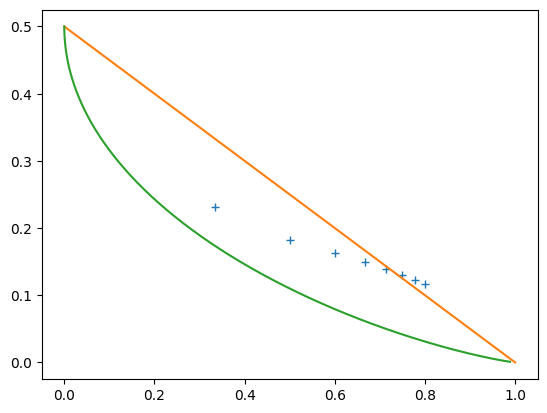

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7ab86ef7f0>

In [20]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)

#xlim(0,1)
#ylim(0,0.5)
plot(R,D, "+")
plot((0,1),(0.5,0))
plot(H.(0:0.001:0.5), 0:0.001:0.5)

In [13]:
#2N=kM; α=2/k; r=1-2/k

In [14]:
using PyPlot

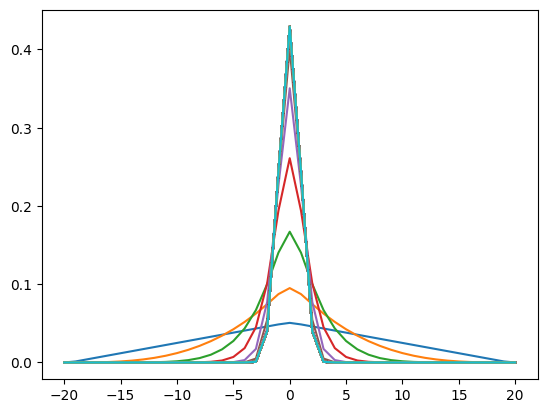

In [15]:
N=20
p = OffsetArray(zeros(2N+1), -N:N)
p .= 1/length(p)
#p .= 1/(2N+1)

for i=1:100
    p=iter(p,2)
    plot(-N:N, p)
end

$$\delta\left(f;\min_{j=1,\dots,k}f_{j}\right) = \mathbb1[f\leq f_j \forall j]-\mathbb1[f < f_j \forall j]$$


